In [90]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from scipy.optimize import fsolve
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%matplotlib notebook

In [91]:
def f2(x): #this gives the position of the lightparticle when moving up and down at time x
    return(abs(abs(x%1-0.5)-0.5))  #light moves up and down. takes 1 timeunit to move up and down once

In [92]:
def functiontosolve(lam,tau,x,y,v_vector): #this function needs to be 0 for the particle to meet the observer at time tau

    x = np.array([lam[0],x[0],x[1],x[2]])   #position of particle
    o = np.array([tau,y[0],y[1],y[2]])      #position of observer
    xP = LorentzBoost(v_vector,x)     #position of lightparticle in observer frame

    s = np.subtract(xP,o)             #difference of observer and lightparicle 

    d = np.linalg.norm(s[1:])          #distance between lightparticle and observer

    return(d+xP[0]-tau)                 #return the value that should be zero,
                                         #when this is zero the light of the object hits the observer at time tau

In [93]:
def functiontosolveclock(lam,tau,y,v_vector): #this function needs to be 0 for the particle to meet the observer at time tau
                                                #works for the lightclock moving up and down
    x = np.array([lam[0],0,0,f2(lam)[0]])#position of lightparticle in the clock
    o = np.array([tau,y[0],y[1],y[2]])      #position of observer
    xP = LorentzBoost(v_vector,x)     #position of lightüparticle in observer frame

    s = np.subtract(xP,o)             #difference of observer and lightparicle 

    d = np.linalg.norm(s[1:])          #distance between lightparticle and observer

    return(d+xP[0]-tau)                 #return the value that should be zero,
                                         #when this is zero the light of the object hits the observer at time tau

In [94]:
def LorentzBoost(v_vector,co_vector): #boosts the vector co_vector with the speed v_vector

        v_x = v_vector[0]
        v_y = v_vector[1]
        v_z = v_vector[2]
        

        v = np.sqrt(v_x**2 + v_y**2 + v_z**2)

        c = 1 #c := 100% the speed of light

        gamma = 1/np.sqrt(1-(v**2/c**2))

        B = np.array([[gamma, ((-gamma*v_x)/c), ((-gamma*v_y)/c), ((-gamma*v_z)/c)],
                      [((-gamma*v_x)/c), (1 + ((gamma-1)*(((v_x**2))/v**2))), ((gamma-1)*((v_x*v_y)/v**2)), ((gamma-1)*((v_x*v_z)/v**2))],
                      [((-gamma*v_y)/c), ((gamma-1)*((v_y*v_x)/v**2)), (1 + ((gamma-1)*(((v_y**2))/v**2))) , ((gamma-1)*((v_y*v_z)/v**2))],
                      [((-gamma*v_z)/c), ((gamma-1)*((v_z*v_x)/v**2)), ((gamma-1)*((v_z*v_y)/v**2)), (1 + ((gamma-1)*(((v_z**2))/v**2)))]])

        return np.matmul(B, co_vector)

In [95]:
def TransformClock(y,v_vector,tau): #v_vector: speed of moving frame relative to observer, tau: time at observer
  
    lam = fsolve(functiontosolveclock,x0=tau,args=(tau,y,v_vector))  #x0 besser als tau wählen oder noch besseren guess abgeben

    x = np.array([lam[0],0,0,f2(lam[0])]) #lightparticle at time lambda in the moving  frame
    xP = LorentzBoost(v_vector,x) #boost it back to observer frame

    #print(f"lambda = {lam1}; x = {x}; xP = {xP}")

    return xP

In [96]:
def Transform(x,y,v_vector,tau):     #x: Position of Object in its frame, y, position of observer
                                        #v_vector: speed of moving frame relative to observer, tau: time at observer
    lam = fsolve(functiontosolve,x0=tau,args=(tau,x,y,v_vector))  #x0 besser als tau wählen oder noch besseren guess abgeben

    x = np.array([lam[0],x[0],x[1],x[2]]) #lightparticle at time lambda in the moving  frame
    xP = LorentzBoost(v_vector,x) #boost it back to observer frame

    #print(f"lambda = {lam1}; x = {x}; xP = {xP}")

    return xP

In [97]:
def vlength(x): # x := vector with [x1,x2,x3,..,xn] 
    
    vint = 0
    
    for n in range(0,len(x)):
        vint += x[n]**2
    
    vlen = np.sqrt(vint)
    
    return vlen

print(vlength(np.array([4,4,4,4])))
#np.linalg.norm

8.0


In [98]:
def relativespeedconversion(v):
    nrs = []
    c = 3*10**8
    for n in range(0, len(v)):
        nrs.append(v[n]*c)
    return nrs

In [99]:
Observer=np.array([0,10,0]) #set up observer position
relativespeed=np.array([0.95,0,0]) #set up relative speed

wavelength = 500 #[nm]
c = 3*10**8 # [m/s] rough estimate for the speed of light
f_s = c/wavelength*10**9#[Hz|1/s]

print(f_s)

600000000000000.0


In [100]:
def vectorbetweenXO(x,o): # x := [x1,x2,x3,x4] object vector; o := is [o1,o2,o3,o4] observer vector
    xo = np.subtract(x,o)
    
    return xo

In [101]:
def thetaCalc(xo,v): # xo := [xo1,xo2,xo3,xo4] being the vector between observer and emitter; v := velocity of the emitter
    theta = np.arccos((np.dot(xo,v))/(vlength(xo)*vlength(v)))
    
    #print(np.dot(xo,v),(vlength(xo)*vlength(v)))
    
    return theta

xo = vectorbetweenXO(np.array([0,0,0]),Observer)
print(xo)



print(thetaCalc(xo,relativespeedconversion(relativespeed)))

print(thetaCalc(np.array([100,0,0]),np.array([1,1,0]))/2/np.pi*360)


[  0 -10   0]
1.5707963267948966
45.00000000000001


In [102]:
def frequency_received(theta_r,f_s,v_s):# received frequency
    c = 3*10**8 # rough estimate for the speed of light
    beta = v_s / c #beta notation used in galilean as well as in lorentz transformations
    gamma = 1 / np.sqrt((1 - beta**2))
    
    
    f_r = f_s / (gamma*(1 + beta*np.cos(theta_r)))
    
    return f_r

xo = vectorbetweenXO(np.array([0,0,0]),Observer)
v_s = vlength(relativespeedconversion(relativespeed))
print(xo)
print(v_s,frequency_received(thetaCalc(xo,relativespeed),f_s,v_s))

[  0 -10   0]
285000000.0 187349939951952.0


In [103]:
wavelength = lambda f : c / f #compute wavelength

In [104]:
frequency = lambda w: c/w

In [105]:
def waveToRGB(wave):
    gamma = 0.8
    intensity_max = 1
    
    if wave < 380:
        red, green, blue = 1,1,1
    elif wave < 440:
        red = -(wave - 440) / (440 - 380)
        green, blue = 0, 1
    elif wave < 490:
        red = 0
        green = (wave - 440) / (490 - 440)
        blue = 1
    elif wave < 510:
        red, green = 0, 1
        blue = -(wave - 510) / (510 - 490)
    elif wave < 580:
        red = (wave - 510) / (580 - 510)
        green, blue = 1, 0
    elif wave < 645:
        red = 1
        green = - (wave - 645) / (645 - 580)
        blue = 0
    elif wave <= 780:
        red, green, blue = 1, 0 ,0
    else:
        red, green, blue = 1,1,1
    
    if wave < 380:
        factor = 0
    elif wave < 420:
        factor = 0.3 + 0.7 * (wave - 380) / (420 - 380)
    elif wave < 700:
        factor = 1
    elif wave <= 780:
        factor = 0.3 + 0.7 * (780 - wave) / (780 - 700)
    else:
        factor = 0
    
    def f(c):
        if c == 1:
            return 1
        else:
            return intensity_max * pow(c * factor, gamma)
    
    return f(red), f(green), f(blue)

In [106]:
def realPerspectiveShapes(x,o): # Assume that our plane is vertical and inifinite at the intersection y = 5
    output=np.zeros((len(x),3))
    for i in np.arange(len(x)):
        
        s1 = x[i][0] + ((5-x[i][1])/(o[1]-x[i][1]))*(o[0]-x[i][0])
        s2 = 5
        s3 = x[i][2] + ((5-x[i][1])/(o[1]-x[i][1]))*(o[2]-x[i][2])
    
        s = np.array([s1,s2,s3])
        output[i,:] = s
    
    return output

In [107]:
def realPerspectiveMI(x,o):
    
    s1 = x[0] + ((5-x[1])/(o[1]-x[1]))*(o[0]-x[0])
    s2 = 5
    s3 = x[2] + ((5-x[1])/(o[1]-x[1]))*(o[2]-x[2])

    s = np.array([s1,s2,s3])
    
    
    return s

In [108]:
f = (3*10**8)/(400*10**-9)
print(f)

xor = np.array([0,0,0])
oor = np.array([0,10,0])
vor = np.array([0.2,0,0.2])

p = Transform(xor,oor,vor,5)
print(p)

xoor = vectorbetweenXO(xor,oor)
xpor = vectorbetweenXO(p[1:],oor)
t = thetaCalc(xpor,vor)

print(xpor,t)
fr = frequency_received(t,f,0.2*3*10**8)

print((3*10**8)/fr)


749999999999999.9
[-5.10365186  1.02073037  0.          1.02073037]
[  1.02073037 -10.           1.02073037] 1.4274335680043424
4.1991375486100753e-07


705882352941176.5
194070749169776.03
1545.8280100601635
[  0 -10   0]
[0.95 0.   0.  ]


<IPython.core.display.Javascript object>


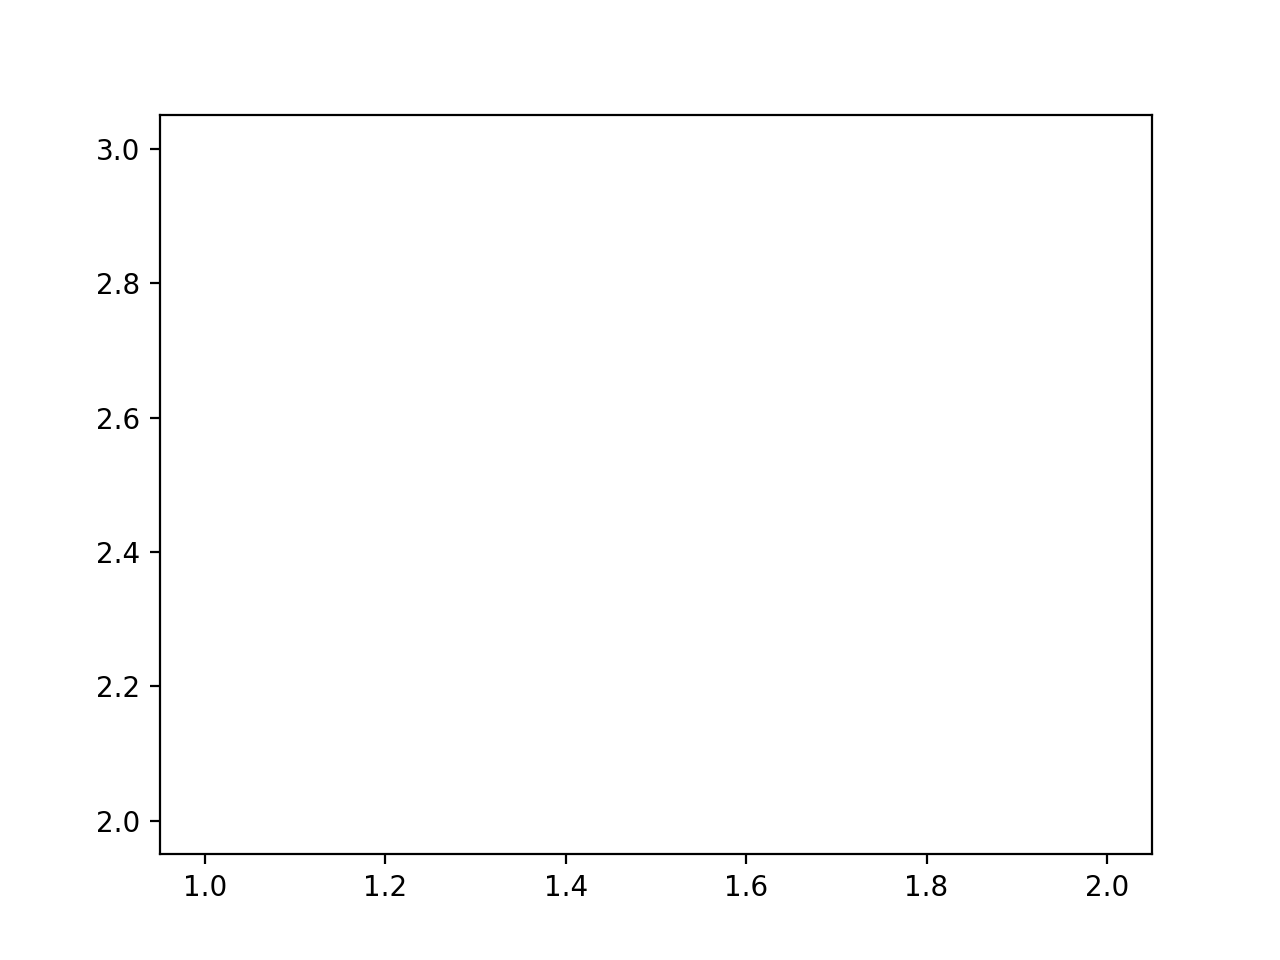

(1, 1, 1)
3.202563076101742


In [109]:
import matplotlib.pyplot as plt
col=425*10**-9
f_s=frequency(col)
f_r=frequency_received(thetaCalc(xpor,vor),f_s,v_s)
print(f_s)
print(f_r)
print(wavelength(f_r)*10**9)
print(xo)
print(relativespeed)
plt.scatter(np.array([1,2]),np.array([2,3]),color=(1,1,1))
plt.show()
print(waveToRGB(2000))
print(1/np.sqrt(1-0.95**2))

def colorTransform(col,xo,v_s): # Transforms wavelength to the relative wavelength and transforms into RGB Value
    
    f_s = frequency(col)
    f_r=frequency_received(thetaCalc(xo,relativespeed),f_s,v_s)
    
    newcol = waveToRGB(wavelength(f_r)*10**9)
    
    return newcol

In [110]:
cd 

/Users/valentino


<IPython.core.display.Javascript object>


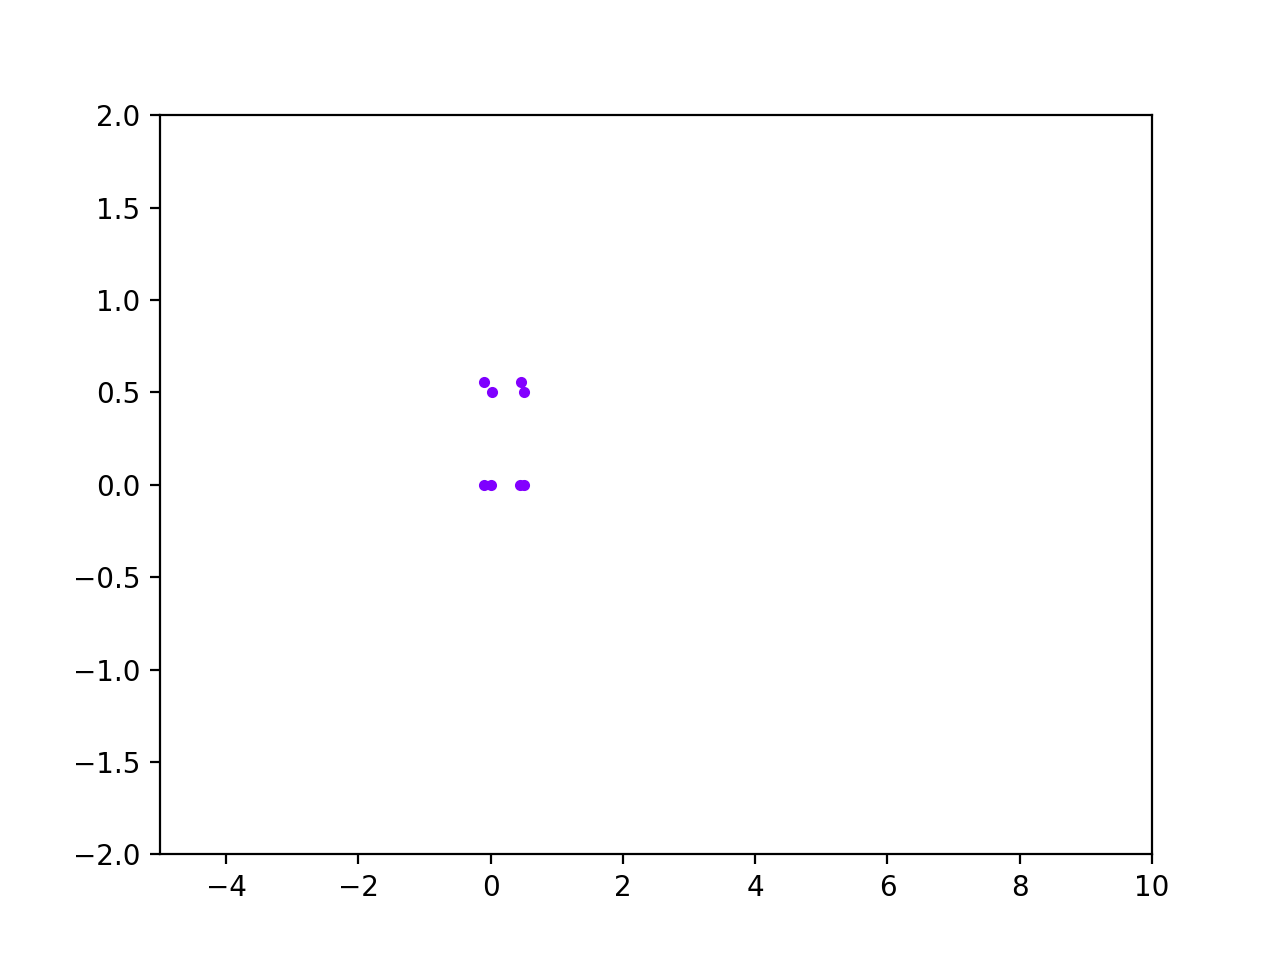

In [111]:
import numpy as np
from matplotlib.animation import FuncAnimation, PillowWriter
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML, Image
from IPython import display
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%matplotlib notebook

rc('animation', html='html5')

fig, ax = plt.subplots()

line, = ax.plot([],[],'b.')
line2, = ax.plot([],[],'b.')
line3, = ax.plot([],[],'b.')
line4, = ax.plot([],[],'b.')
line1, = ax.plot([],[],'b.')
line21, = ax.plot([],[],'b.')
line31, = ax.plot([],[],'b.')
line41, = ax.plot([],[],'b.')

ax.set_xlim(-5,10)
ax.set_ylim(-2,2)

col=400*10**-9
Observer=np.array([0,10,0]) #set up observer position
relativespeed=np.array([0.2,0,0]) #set up relative speed
f_s=frequency(col)

def animate(ntau):
    #ntau= ntau/5
    
    p1position=Transform(np.array([0,0,0]),Observer,relativespeed,ntau)[1:]
    p2position=Transform(np.array([0,0,1]),Observer,relativespeed,ntau)[1:]
    p3position=Transform(np.array([0,1,1]),Observer,relativespeed,ntau)[1:]
    p4position=Transform(np.array([0,1,0]),Observer,relativespeed,ntau)[1:]
    p11position=Transform(np.array([-1,0,0]),Observer,relativespeed,ntau)[1:] #1 := indicating that it is indeed behind point n = {1,4} since it is a square
    p21position=Transform(np.array([-1,0,1]),Observer,relativespeed,ntau)[1:]
    p31position=Transform(np.array([-1,1,1]),Observer,relativespeed,ntau)[1:]
    p41position=Transform(np.array([-1,1,0]),Observer,relativespeed,ntau)[1:]
    
    #x1_data = Transform(np.array([0,0,0]),Observer,relativespeed,ntau)[1] #Transform bottom of the clock (0,0,0)
    #y1_data = Transform(np.array([0,0,0]),Observer,relativespeed,ntau)[3] #Transform bottom of the clock (0,0,0)
    #x2_data = Transform(np.array([0,0,0.5]),Observer,relativespeed,ntau)[1] #Transform top of the clock (0,0,0.5)
    #y2_data = Transform(np.array([0,0,0.5]),Observer,relativespeed,ntau)[3] #Transform bottom of the clock (0,0,0.5)
    #x3_data = Transform(np.array([0,0.5,0.5]),Observer, relativespeed,ntau)[1] #actually y := z
    #y3_data = Transform(np.array([0,0.5,0.5]),Observer, relativespeed,ntau)[3]
    #x4_data = Transform(np.array([0,0.5,0]),Observer, relativespeed,ntau)[1]
    #y4_data = Transform(np.array([0,0.5,0]),Observer, relativespeed,ntau)[3]
    lightx_data = TransformClock(Observer,relativespeed,ntau)[1] #Transform light in the clock
    lighty_data = TransformClock(Observer,relativespeed,ntau)[3] #Transform light in the clock
    
    o = Observer
    p1o = vectorbetweenXO(p1position,o)
    p2o = vectorbetweenXO(p2position,o)
    p3o = vectorbetweenXO(p3position,o)
    p4o = vectorbetweenXO(p4position,o)
    p11o = vectorbetweenXO(p11position,o)
    p21o = vectorbetweenXO(p21position,o)
    p31o = vectorbetweenXO(p31position,o)
    p41o = vectorbetweenXO(p41position,o)
    v_s = vlength(relativespeedconversion(relativespeed))
    
    line.set_data([realPerspectiveMI(p1position,o)[0]], [realPerspectiveMI(p1position,o)[2]]) #update clock top and bottom
    line.set_color(colorTransform(col,p1o,-v_s))
    
    line2.set_data([realPerspectiveMI(p2position,o)[0]], [realPerspectiveMI(p2position,o)[2]])
    line2.set_color(colorTransform(col,p2o,-v_s))
 
    line3.set_data([realPerspectiveMI(p3position,o)[0]], [realPerspectiveMI(p3position,o)[2]])
    line3.set_color(colorTransform(col,p3o,-v_s))
    
    line4.set_data([realPerspectiveMI(p4position,o)[0]], [realPerspectiveMI(p4position,o)[2]])
    line4.set_color(colorTransform(col,p4o,-v_s))
    
    line1.set_data([realPerspectiveMI(p11position,o)[0]], [realPerspectiveMI(p11position,o)[2]])
    line1.set_color(colorTransform(col,p11o,-v_s))
    
    line21.set_data([realPerspectiveMI(p21position,o)[0]], [realPerspectiveMI(p21position,o)[2]])
    line21.set_color(colorTransform(col,p21o,-v_s))
    
    line31.set_data([realPerspectiveMI(p31position,o)[0]], [realPerspectiveMI(p31position,o)[2]])
    line31.set_color(colorTransform(col,p31o,-v_s))
    
    line41.set_data([realPerspectiveMI(p41position,o)[0]], [realPerspectiveMI(p41position,o)[2]])
    line41.set_color(colorTransform(col,p41o,-v_s))
    
    
    return line

anim = FuncAnimation(fig, animate, frames=100, interval=100)

plt.show()

#anim.save('/Users/valentino/Desktop/Simy0.2Square/simy02.gif', writer=PillowWriter(fps=60))

 
# good practice to close the plt object.
#plt.close()



<IPython.core.display.Javascript object>


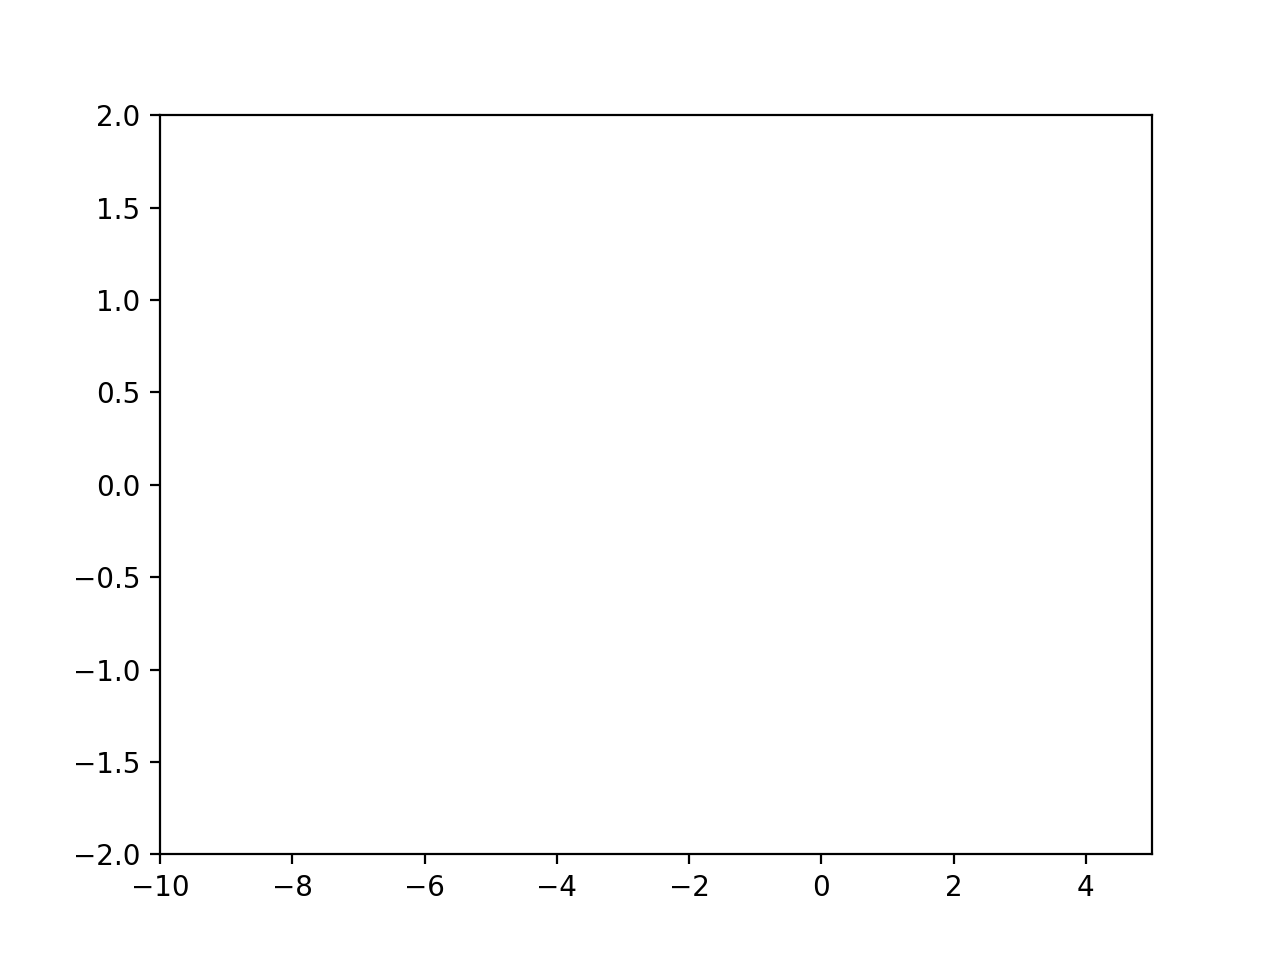

In [112]:
import numpy as np
from matplotlib.animation import FuncAnimation, PillowWriter
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML, Image
from IPython import display
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%matplotlib notebook

rc('animation', html='html5')

fig, ax = plt.subplots()

line, = ax.plot([],[],'b.')
line2, = ax.plot([],[],'b.')
line3, = ax.plot([],[],'b.')
line4, = ax.plot([],[],'b.')
line1, = ax.plot([],[],'b.')
line21, = ax.plot([],[],'b.')
line31, = ax.plot([],[],'b.')
line41, = ax.plot([],[],'b.')

ax.set_xlim(-10,5)
ax.set_ylim(-2,2)

relativespeed = np.array([0.2,0,0])

def animate(ntau):
    #ntau=2+ntau/100
    
    p1position=Transform(np.array([0,0,0]),Observer,relativespeed,ntau)[1:]
    p2position=Transform(np.array([0,0,1]),Observer,relativespeed,ntau)[1:]
    p3position=Transform(np.array([0,1,1]),Observer,relativespeed,ntau)[1:]
    p4position=Transform(np.array([0,1,0]),Observer,relativespeed,ntau)[1:]
    p11position=Transform(np.array([-1,0,0]),Observer,relativespeed,ntau)[1:] #1 := indicating that it is indeed behind point n = {1,4} since it is a square
    p21position=Transform(np.array([-1,0,1]),Observer,relativespeed,ntau)[1:]
    p31position=Transform(np.array([-1,1,1]),Observer,relativespeed,ntau)[1:]
    p41position=Transform(np.array([-1,1,0]),Observer,relativespeed,ntau)[1:]
    
    #x1_data = Transform(np.array([0,0,0]),Observer,relativespeed,ntau)[1] #Transform bottom of the clock (0,0,0)
    #y1_data = Transform(np.array([0,0,0]),Observer,relativespeed,ntau)[3] #Transform bottom of the clock (0,0,0)
    #x2_data = Transform(np.array([0,0,0.5]),Observer,relativespeed,ntau)[1] #Transform top of the clock (0,0,0.5)
    #y2_data = Transform(np.array([0,0,0.5]),Observer,relativespeed,ntau)[3] #Transform bottom of the clock (0,0,0.5)
    #x3_data = Transform(np.array([0,0.5,0.5]),Observer, relativespeed,ntau)[1] #actually y := z
    #y3_data = Transform(np.array([0,0.5,0.5]),Observer, relativespeed,ntau)[3]
    #x4_data = Transform(np.array([0,0.5,0]),Observer, relativespeed,ntau)[1]
    #y4_data = Transform(np.array([0,0.5,0]),Observer, relativespeed,ntau)[3]
    lightx_data = TransformClock(Observer,relativespeed,ntau)[1] #Transform light in the clock
    lighty_data = TransformClock(Observer,relativespeed,ntau)[3] #Transform light in the clock
    
    o = Observer
    p1o = vectorbetweenXO(p1position,o)
    p2o = vectorbetweenXO(p2position,o)
    p3o = vectorbetweenXO(p3position,o)
    p4o = vectorbetweenXO(p4position,o)
    p11o = vectorbetweenXO(p11position,o)
    p21o = vectorbetweenXO(p21position,o)
    p31o = vectorbetweenXO(p31position,o)
    p41o = vectorbetweenXO(p41position,o)
    v_s = vlength(relativespeedconversion(relativespeed))
    
    line.set_data([realPerspectiveMI(p1position,o)[0]], [realPerspectiveMI(p1position,o)[2]]) #update clock top and bottom
    line.set_color('red')
    
    line2.set_data([realPerspectiveMI(p2position,o)[0]], [realPerspectiveMI(p2position,o)[2]])
    line2.set_color('red')
 
    line3.set_data([realPerspectiveMI(p3position,o)[0]], [realPerspectiveMI(p3position,o)[2]])
    line3.set_color('blue')
    
    line4.set_data([realPerspectiveMI(p4position,o)[0]], [realPerspectiveMI(p4position,o)[2]])
    line4.set_color('blue')
    
    line1.set_data([realPerspectiveMI(p11position,o)[0]], [realPerspectiveMI(p11position,o)[2]])
    line1.set_color('red')
    
    line21.set_data([realPerspectiveMI(p21position,o)[0]], [realPerspectiveMI(p21position,o)[2]])
    line21.set_color('red')
    
    line31.set_data([realPerspectiveMI(p31position,o)[0]], [realPerspectiveMI(p31position,o)[2]])
    line31.set_color('blue')
    
    line41.set_data([realPerspectiveMI(p41position,o)[0]], [realPerspectiveMI(p41position,o)[2]])
    line41.set_color('blue')
    
    
    return line

anim = FuncAnimation(fig, animate, frames=100, interval=100)

plt.show()

#anim.save('/Users/valentino/Desktop/Sim095FL/simT2.gif', writer=PillowWriter(fps=60))

 
# good practice to close the plt object.
#plt.close()




In [113]:
# import the math module to use the sin and cos functions
import math

# define the function
def get_sphere_coordinates(radius, center_x, center_y, center_z):
  # create an empty list to store the coordinates
    x_coordinates = []
    y_coordinates = []
    z_coordinates = []

    num = 10
  # calculate the coordinates for a full sphere by iterating over
  # a range of angles from 0 to 2 * pi radians for theta and phi
    for theta in np.arange(0, math.pi, 0.7):
        for phi in np.arange(0, 2 * math.pi, 0.6):
      # calculate the x, y, and z coordinates using the formula
      # x = center_x + radius * sin(phi) * cos(theta)
      # y = center_y + radius * sin(phi) * sin(theta)
      # z = center_z + radius * cos(phi)
            x = center_x + radius * math.sin(phi) * math.cos(theta)
            y = center_y + radius * math.sin(phi) * math.sin(theta)
            z = center_z + radius * math.cos(phi)
      
      # add the coordinates to the list
            x_coordinates.append(x)
            y_coordinates.append(y)
            z_coordinates.append(z)
  
  # return the list of coordinates
    return x_coordinates,y_coordinates,z_coordinates

# example usage
sphere_coordinates = get_sphere_coordinates(1, 1, 3, 4)
print(sphere_coordinates)


([1.0, 1.5646424733950353, 1.9320390859672263, 1.9738476308781951, 1.675463180551151, 1.1411200080598671, 0.5574795567051479, 0.1284242275864118, 0.0038353911641593186, 0.2272355124440123, 0.7205845018010741, 1.0, 1.4318623843851825, 1.7128628131458088, 1.744839752082696, 1.5166227364428797, 1.1079345356341135, 0.6615416962322639, 0.3333820798430237, 0.23809128168259874, 0.40895711908190147, 0.7862912391963485, 1.0, 1.0959706679630796, 1.1584160205132017, 1.1655220994405353, 1.1148065469325887, 1.0239857645759947, 0.9247860645782259, 0.8518607561417917, 0.830684747577836, 0.8686554279153399, 0.9525085460890811, 1.0, 0.7149424468148879, 0.5294636981146345, 0.5083568170773436, 0.6589950444981214, 0.9287561136498756, 1.223404722003208, 1.4400116335666115, 1.5029098223110147, 1.3901271413157452, 1.141061825830556, 1.0, 0.46798124707678923, 0.1218119508252834, 0.08241900577931949, 0.3635635009855981, 0.867033575690652, 1.4169526478750076, 1.8212181643536247, 1.9386085494285838, 1.7281159642

In [114]:
a=np.zeros((3,8))
print(a[0,:])

[0. 0. 0. 0. 0. 0. 0. 0.]


In [115]:

def positionTransform(array_x, array_y,array_z,o,v,ntau):
    pnposition = []
    
    # define the function
    def get_min_array(array1, array2, array3):
      # calculate the length of each array
        len1 = len(array1)
        len2 = len(array2)
        len3 = len(array3)

        # compare the lengths and return the array with the minimal length
        if len1 <= len2 and len1 <= len3:
            return array1
        elif len2 <= len1 and len2 <= len3:
            return array2
        else:
            return array3

    # example usage

    
    for i in range(0, len(array_x)):
        pnposition.append(Transform(np.array([array_x[i],array_y[i],array_z[i]]),o,v,ntau)[1:])

    return pnposition
ntau = np.linspace(0,10,100)
Observer = np.array([0,10,0])
#print(positionTransform(np.array([1,1]),np.array([1,0]),np.array([1,0]),Observer,relativespeed,100))
print(positionTransform(sphere_coordinates[0],sphere_coordinates[1],sphere_coordinates[2],Observer,relativespeed,ntau))
#print(realPerspective(positionTransform(sphere_coordinates[0],sphere_coordinates[1],sphere_coordinates[2],Observer,relativespeed,ntau),Observer))

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

In [116]:
ntau = np.linspace(0,10,100)
sphere_coordinates = get_sphere_coordinates(1, 1, 3, 4)
Observer = np.array([0,10,0])
relativespeed = np.array([0,0,0.5])
pnposition = positionTransform(sphere_coordinates[0],sphere_coordinates[1],sphere_coordinates[2],o,v_rs,ntau)

print(pnposition)


NameError: name 'o' is not defined

In [117]:
def line_to_coordinates(n):
    # Generate evenly spaced x and y coordinates
    x = np.linspace(-2, 2, num=n)
    y = np.zeros(n)
    
    # Set z equal to x for a straight line
    z = y
    
    # Return the (x, y, z) coordinates as a list of tuples
    return x, y, z



# Generate coordinates for a line with 5 points
coordinates = line_to_coordinates(5)

print("Line coordinates:", positionTransform(coordinates[0],coordinates[1],coordinates[2], Observer, relativespeed, 1))

Line coordinates: [array([-2.      ,  0.      ,  5.230602]), array([-1.        ,  0.        ,  5.14519859]), array([0.        , 0.        , 5.11645052]), array([1.        , 0.        , 5.14519859]), array([2.      , 0.      , 5.230602])]


In [118]:
def line_to_coordinates(n):
    # Generate evenly spaced x and y coordinates
    x = np.linspace(-2, 2, num=n)
    y = [2 for i in range(n)]
    
    # Set z equal to x for a straight line
    z = y
    
    # Return the (x, y, z) coordinates as a list of tuples
    return x, y, z



# Generate coordinates for a line with 5 points
coordinates1 = line_to_coordinates(5)

print("Line coordinates:", positionTransform(coordinates[0],coordinates[1],coordinates[2], Observer, relativespeed, 1))

Line coordinates: [array([-2.      ,  0.      ,  5.230602]), array([-1.        ,  0.        ,  5.14519859]), array([0.        , 0.        , 5.11645052]), array([1.        , 0.        , 5.14519859]), array([2.      , 0.      , 5.230602])]


<IPython.core.display.Javascript object>


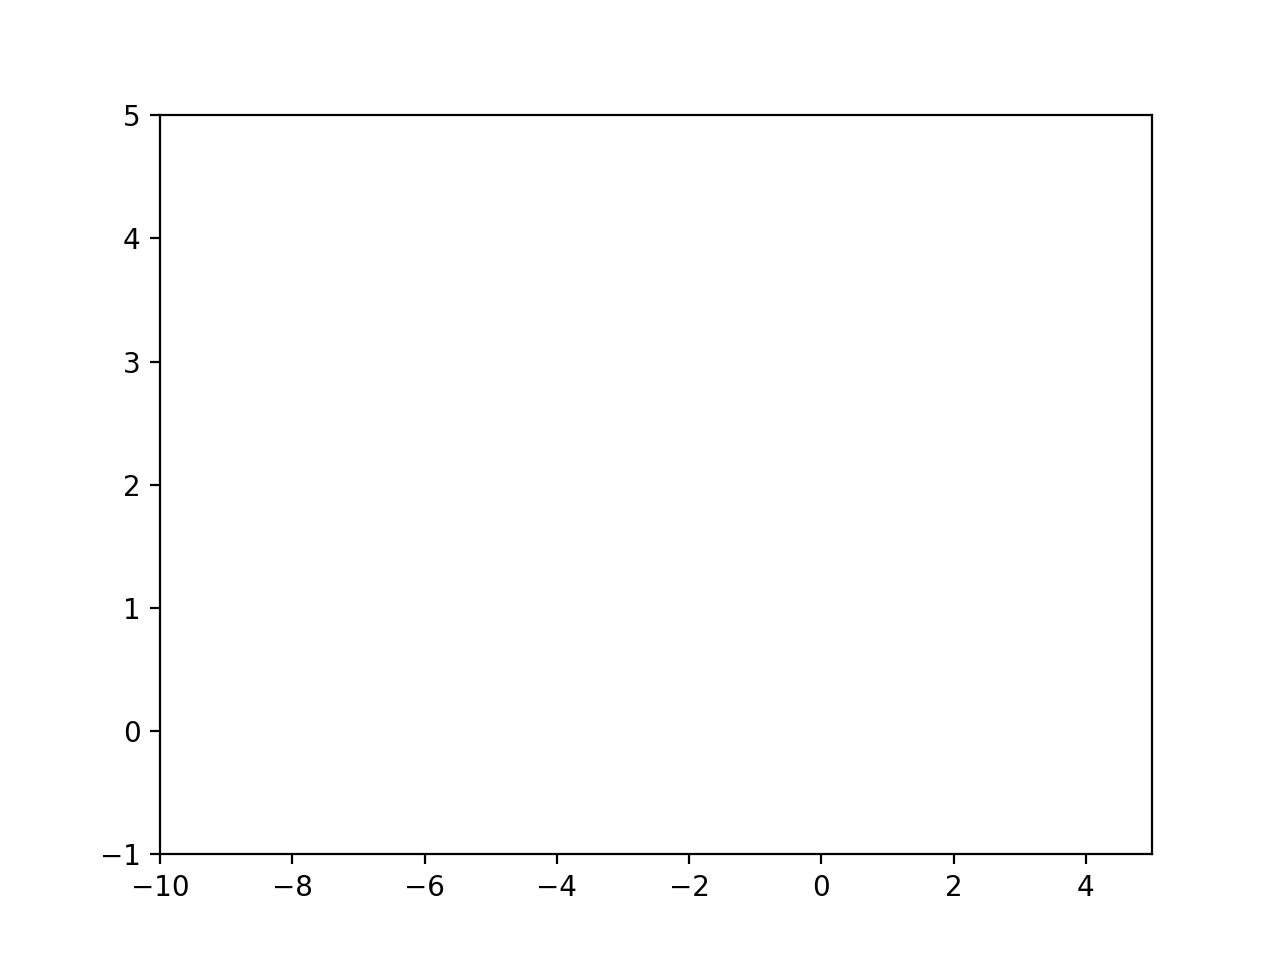

In [119]:
import matplotlib.pyplot as plt
# assuming that a square is traveling
import numpy as np
from matplotlib.animation import FuncAnimation
from scipy.optimize import fsolve
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%matplotlib notebook
    
rc('animation', html='html5')
    
fig, ax = plt.subplots()

line, = ax.plot([],[],'.')

ax.set_xlim(-10,5)
ax.set_ylim(-1, 5)



def animate(ntau):
    pnposition = positionTransform(coordinates[0],coordinates[1],coordinates[2],Observer,relativespeed,ntau)
    pnposition = positionTransform(coordinates1[0],coordinates1[1],coordinates1[2],Observer,relativespeed,ntau)
    
    
    o = Observer
    
    
    line.set_data(realPerspectiveShapes(pnposition,o)[:,0],realPerspectiveShapes(pnposition,o)[:,2]) #[:,0] x and z: column 0
    
    
    
    
    return line,

anim = FuncAnimation(fig, animate, frames=100, interval=100)

#anim.save('/Users/valentino/Desktop/sims1.gif', writer=PillowWriter(fps=60))




<IPython.core.display.Javascript object>


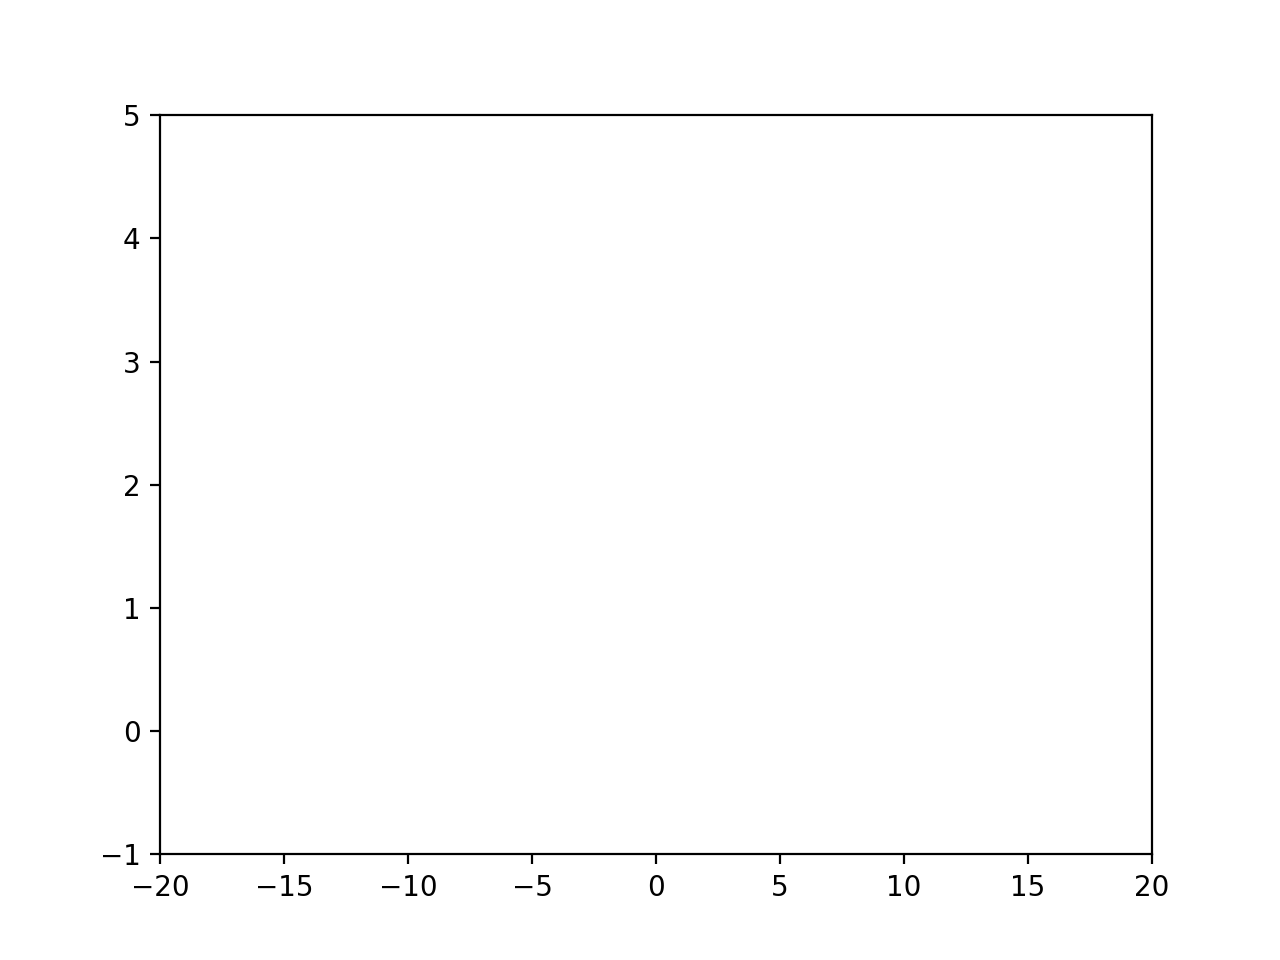

In [120]:
import matplotlib.pyplot as plt
# assuming that a square is traveling
import numpy as np
from matplotlib.animation import FuncAnimation
from scipy.optimize import fsolve
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%matplotlib notebook
    
rc('animation', html='html5')
    
fig, ax = plt.subplots()

line, = ax.plot([],[],'.')

ax.set_xlim(-20,20)
ax.set_ylim(-1, 5)



def animate(ntau):
    pnposition = positionTransform(sphere_coordinates[0],sphere_coordinates[1],sphere_coordinates[2],Observer,relativespeed,ntau)
    
    
    o = Observer
    
    
    line.set_data(realPerspectiveShapes(pnposition,o)[:,0],realPerspectiveShapes(pnposition,o)[:,2]) #[:,0] x and z: column 0
    
    
    
    
    return line,

anim = FuncAnimation(fig, animate, frames=100, interval=100)

#anim.save('/Users/valentino/Desktop/sims1.gif', writer=PillowWriter(fps=60))



In [121]:
print(positionTransform(sphere_coordinates[0],sphere_coordinates[1],sphere_coordinates[2],Observer,relativespeed,ntau))

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.